# Homework 4 - Week 4

### Question 9.1

***Using the same crime data set uscrime.txt as in Question 8.2, apply Principal Component Analysis and then create a regression model using the first few principal components. Specify your new model in terms of the original variables (not the principal components), and compare its quality to that of your solution to Question 8.2. You can use the R function prcomp for PCA. (Note that to first scale the data, you can include scale. = TRUE to scale as part of the PCA function. Don’t forget that, to make a prediction for the new city, you’ll need to unscale the coefficients (i.e., do the scaling calculation in reverse)!)***

In [2]:
library(dplyr)
library(DAAG)

In [5]:
crimedata <- read.table("uscrime.txt",header = TRUE,stringsAsFactors = FALSE)

In [6]:
head(crimedata)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


We call prcomp() to do PCA on the data.

In [7]:
crimedatapca <- prcomp(crimedata[,1:15], center = TRUE, scale. = TRUE)

In [9]:
crimedatapca

Standard deviations (1, .., p=15):
 [1] 2.45335539 1.67387187 1.41596057 1.07805742 0.97892746 0.74377006
 [7] 0.56729065 0.55443780 0.48492813 0.44708045 0.41914843 0.35803646
[13] 0.26332811 0.24180109 0.06792764

Rotation (n x k) = (15 x 15):
               PC1         PC2           PC3         PC4         PC5
M      -0.30371194  0.06280357  0.1724199946 -0.02035537 -0.35832737
So     -0.33088129 -0.15837219  0.0155433104  0.29247181 -0.12061130
Ed      0.33962148  0.21461152  0.0677396249  0.07974375 -0.02442839
Po1     0.30863412 -0.26981761  0.0506458161  0.33325059 -0.23527680
Po2     0.31099285 -0.26396300  0.0530651173  0.35192809 -0.20473383
LF      0.17617757  0.31943042  0.2715301768 -0.14326529 -0.39407588
M.F     0.11638221  0.39434428 -0.2031621598  0.01048029 -0.57877443
Pop     0.11307836 -0.46723456  0.0770210971 -0.03210513 -0.08317034
NW     -0.29358647 -0.22801119  0.0788156621  0.23925971 -0.36079387
U1      0.04050137  0.00807439 -0.6590290980 -0.18279096 -0.1313

In [16]:
summary(crimedatapca)  # How much of the variance is explained by each PC's

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

### rotation matrix is a formula that converts from the original variables to Principal Components


**So PC1 is nothing but (-0.30371194 * M) + (-0.33088129 * SO) + (0.33962148 * Ed) + ............ + (-0.02062867 * Time), similarly it goes for other PC's**

In [14]:
# We use **sdev** to calculate the variation in the original data each PC accounts for
var <- crimedatapca$sdev^2

var.per <- round(var/sum(var)*100, 1) # PERCENTAGE of variation
var.per

[1] 40.1 18.7 13.4  7.7  6.4  3.7  2.1  2.0  1.6  1.3  1.2  0.9  0.5  0.4  0.0

**We can see that the first principal component explains 40.1% variance. Second component explains 18.7% variance. Third component explains 13.4% variance and so on.**

# Selecting number of PCs' according to the following graphs

#### Screen Plot, shows variance explained by each PC's.

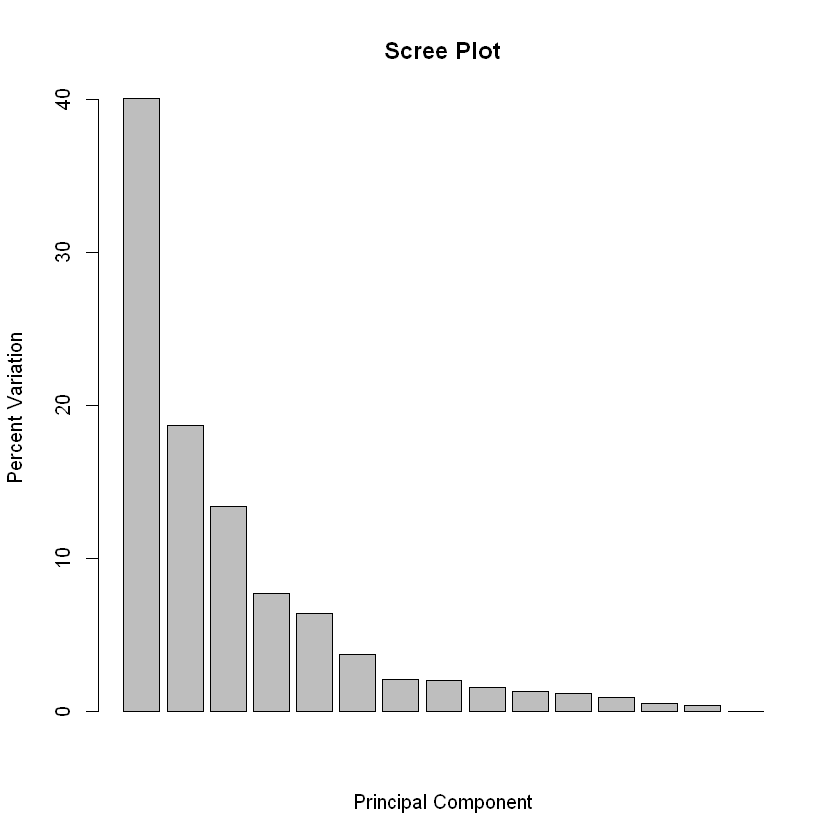

In [15]:
barplot(var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")

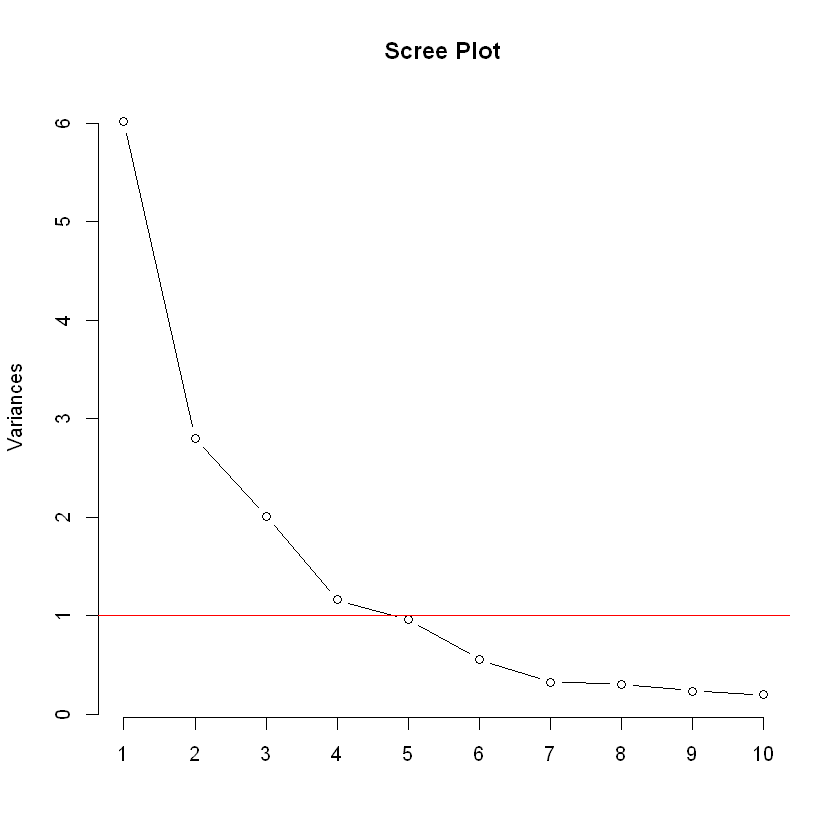

In [11]:
#Determine which PC variables are import. Kaiser method suggests any stdev greater than one is important. 
screeplot(crimedatapca,main = "Scree Plot", type = "line")
abline(h=1, col="red")

### From the above plots; I'm taking the first 5 Principal Components, because they account for a little more than 85% of the variation in data

**based on this technique, we would choose to use the first 5 PCs in our model**

In [17]:
# Make regression models based on PCA to predict crime

pccrime <- as.data.frame(cbind(crimedatapca$x[,1:5],crimedata[,16]))

colnames(pccrime) <- c("PC1", "PC2", "PC3", "PC4", "PC5","Crime")
pccrime

PC1,PC2,PC3,PC4,PC5,Crime
-4.1992835,-1.09383120,-1.11907395,0.67178115,0.055283376,791
1.1726630,0.67701360,-0.05244634,-0.08350709,-1.173199821,1635
-4.1737248,0.27677501,-0.37107658,0.37793995,0.541345246,578
3.8349617,-2.57690596,0.22793998,0.38262331,-1.644746496,1969
1.8392999,1.33098564,1.27882805,0.71814305,0.041590320,1234
2.9072336,-0.33054213,0.53288181,1.22140635,1.374360960,682
0.2457752,-0.07362562,-0.90742064,1.13685873,0.718644387,963
-0.1301330,-1.35985577,0.59753132,1.44045387,-0.222781388,1555
-3.6103169,-0.68621008,1.28372246,0.55171150,-0.324292990,856
1.1672376,3.03207033,0.37984502,-0.28887026,-0.646056610,705


In [22]:
cor(pccrime)[,6]

PC1         PC2         PC3         PC4         PC5       Crime 
 0.41368481 -0.30331302  0.09223697  0.19357298 -0.57972578  1.00000000

The above code shows how each PC is related to responce

In [24]:
#using PCs combined with crime data, we create a linear regression model
#The advantage of doing this is to reduce the complexity of the model while also making it more robust
model <- lm(Crime~.,data = pccrime)
summary(model)


Call:
lm(formula = Crime ~ ., data = pccrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-420.79 -185.01   12.21  146.24  447.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      35.59  25.428  < 2e-16 ***
PC1            65.22      14.67   4.447 6.51e-05 ***
PC2           -70.08      21.49  -3.261  0.00224 ** 
PC3            25.19      25.41   0.992  0.32725    
PC4            69.45      33.37   2.081  0.04374 *  
PC5          -229.04      36.75  -6.232 2.02e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 244 on 41 degrees of freedom
Multiple R-squared:  0.6452,	Adjusted R-squared:  0.6019 
F-statistic: 14.91 on 5 and 41 DF,  p-value: 2.446e-08


In [25]:
# Get coefficients in terms of original data
## from PCA coefficients


# PCA Coefficients for this linear regression model

beta0 <- model$coefficients[1]
betas <- model$coefficients[2:6]
beta0

(Intercept) 
   905.0851

In [26]:
betas

PC1        PC2        PC3        PC4        PC5 
  65.21593  -70.08312   25.19408   69.44603 -229.04282

In [28]:
# Transform the PC coefficients into coefficients for the original variables

crimedatapca$rotation[,1:4]
alphas <- crimedatapca$rotation[,1:4] %*% model$coefficients[2:6]
t(alphas)

,PC1,PC2,PC3,PC4
M,-0.30371194,0.06280357,0.1724199946,-0.02035537
So,-0.33088129,-0.15837219,0.0155433104,0.29247181
Ed,0.33962148,0.21461152,0.0677396249,0.07974375
Po1,0.30863412,-0.26981761,0.0506458161,0.33325059
Po2,0.31099285,-0.26396300,0.0530651173,0.35192809
LF,0.17617757,0.31943042,0.2715301768,-0.14326529
M.F,0.11638221,0.39434428,-0.2031621598,0.01048029
Pop,0.11307836,-0.46723456,0.0770210971,-0.03210513
NW,-0.29358647,-0.22801119,0.0788156621,0.23925971
U1,0.04050137,0.00807439,-0.6590290980,-0.18279096


ERROR: Error in crimedatapca$rotation[, 1:4] %*% model$coefficients[2:6]: non-conformable arguments
